<a href="https://colab.research.google.com/github/fdmy2713-dotcom/ADS1/blob/main/Farah_ADS1_Assignment_Statistics_and_Trends_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# **1. Relational Graph**

In [3]:
# Load the datasets
df_residents_65plus = pd.read_csv('DataGov_Residents_65Plus.csv', index_col='year')

# Print out the dataframe
print("Residents 65Plus Data:")
print(df_residents_65plus)

# Load the datasets
df_nursinghome = pd.read_csv('DataGov_NursingHome_Beds.csv', index_col='year')

# Print out the dataframe
print("\nNursing Home Data:")
print(df_nursinghome)

Residents 65Plus Data:
         Age Category  Living With Spouse & At Least One Child In Household  \
year                                                                          
2024        Sub-Total                                             271800      
2023        Sub-Total                                             243700      
2022        Sub-Total                                             255800      
2021        Sub-Total                                             221800      
2020        Sub-Total                                             214600      
...               ...                                                ...      
2014  85 Years & Over                                               5700      
2013  85 Years & Over                                               5100      
2012  85 Years & Over                                               4800      
2011  85 Years & Over                                               4000      
2010  85 Years & Over        

In [4]:
# Prepare Residents Data
# Keep only year and total residents aged 65+
df_residents = df_residents_65plus.reset_index()[['year', 'Total']].copy()
df_residents['Total'] = pd.to_numeric(df_residents['Total'], errors='coerce')

# Group by year
df_residents = df_residents.groupby('year', as_index=False)['Total'].sum()
df_residents = df_residents.rename(columns={'Total': 'Residents65Plus'})

# Prepare Nursing Home Data
# Sum total number of beds by year
df_nursinghome_beds = df_nursinghome.reset_index().groupby('year', as_index=False)['no_beds'].sum()
df_nursinghome_beds = df_nursinghome_beds.rename(columns={'no_beds': 'NursingHomeBeds'})

# Merge both datasets by year
df_merge = pd.merge(df_residents, df_nursinghome_beds, on='year', how='inner')

In [5]:
# Relational Graph (Scatter Plot with Regression Line)
# Showing the correlation how the number of nursing home beds relates to number of elderly residents (65+).

# Define plotting function
def plot_relational(df):
    """
    Scatter + regression line showing how the number of nursing home beds relates to
    number of elderly residents (65+).
    """
    plt.figure(dpi=144)
    sns.scatterplot(data=df, x="Residents65Plus", y="NursingHomeBeds", s=100)
    sns.regplot(data=df, x="Residents65Plus", y="NursingHomeBeds", scatter=False, color="red")

    for _, row in df.iterrows():
        plt.text(row["Residents65Plus"], row["NursingHomeBeds"], str(row["year"]),
                 fontsize=8, ha='right', va='bottom')

    # Add Title and Labels
    plt.title("Relation: Elderly Residents (65+) vs Nursing Home Beds (Singapore)")
    plt.xlabel("Number of Residents 65+")
    plt.ylabel("Number of Nursing Home Beds")
    plt.tight_layout()

    # Show the Plot
    plt.show()

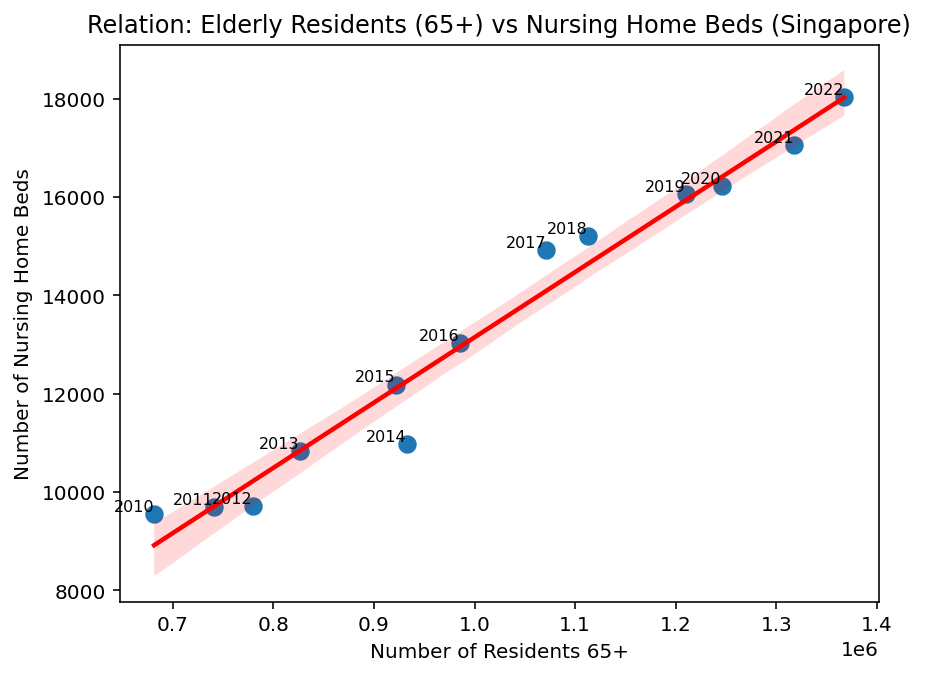

In [6]:
# General correlation between elderly residents (65+) and available nursing home beds.
# Call the plotting function
plot_relational(df_merge)

In [7]:
# Display the merged dataset for verification
print("\nMerged Dataset (for plotting):")
print(df_merge)


Merged Dataset (for plotting):
    year  Residents65Plus  NursingHomeBeds
0   2010           681500             9551
1   2011           740600             9690
2   2012           779700             9721
3   2013           826200            10838
4   2014           932700            10968
5   2015           921900            12185
6   2016           985400            13022
7   2017          1071200            14918
8   2018          1112600            15205
9   2019          1210000            16059
10  2020          1245900            16221
11  2021          1317800            17064
12  2022          1367600            18029


# **2. Categorical Graph**

In [8]:
print("Dataset Preview:")
print(df_residents.head())

Dataset Preview:
   year  Residents65Plus
0  2010           681500
1  2011           740600
2  2012           779700
3  2013           826200
4  2014           932700


In [11]:
# Data Preparation
# Convert numeric columns to numbers (some are stored as strings)
cols_to_convert = [
    'Living With Spouse & At Least One Child In Household',
    'Living With Spouse, No Children In Household',
    'Living Alone In Household',
    'Living With Children But Without Spouse In Household',
    'Others',
    'Total'
]
df_residents_65plus[cols_to_convert] = df_residents_65plus[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Focus on Sub-Total rows (not specific age groups)
df_subtotal = df_residents_65plus[df_residents_65plus['Age Category'] == 'Sub-Total'].copy()

# Reset index to make 'year' a column
df_subtotal = df_subtotal.reset_index()

# --- Melt dataframe to long format for easy plotting ---
df_melted = df_subtotal.melt(
    id_vars=['year'],
    value_vars=[
        'Living With Spouse & At Least One Child In Household',
        'Living With Spouse, No Children In Household',
        'Living Alone In Household',
        'Living With Children But Without Spouse In Household',
        'Others'
    ],
    var_name='Living_Arrangement',
    value_name='Number_of_Residents'
)

In [12]:
print("\nTransformed Data for Categorical Plot:")
print(df_melted.head())


Transformed Data for Categorical Plot:
   year                                 Living_Arrangement  \
0  2024  Living With Spouse & At Least One Child In Hou...   
1  2023  Living With Spouse & At Least One Child In Hou...   
2  2022  Living With Spouse & At Least One Child In Hou...   
3  2021  Living With Spouse & At Least One Child In Hou...   
4  2020  Living With Spouse & At Least One Child In Hou...   

   Number_of_Residents  
0               271800  
1               243700  
2               255800  
3               221800  
4               214600  


In [13]:
# Function 1: Stacked Bar Chart
def plot_categorical_stacked_bar(df):
    """
    Categorical Graph: Stacked Bar Chart comparing living arrangements of elderly residents by year.
    """
    # Pivot data to make categories as columns
    df_pivot = df.pivot(index='year', columns='Living_Arrangement', values='Number_of_Residents')

    # Sort by year for correct order
    df_pivot = df_pivot.sort_index()

    # Plot stacked bar chart
    ax = df_pivot.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        colormap='tab20',
        edgecolor='black'
    )

    plt.title("Stacked Bar Chart: Living Arrangements of Residents Aged 65+ by Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Residents")
    plt.legend(title='Living Arrangement', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

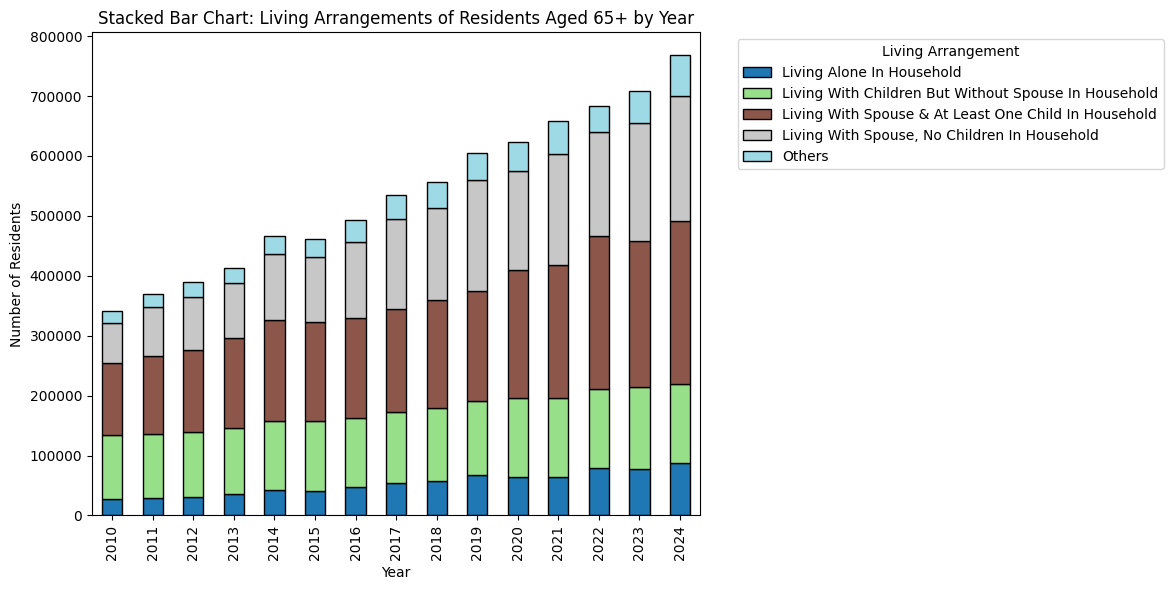

In [14]:
# Call the Functions
plot_categorical_stacked_bar(df_melted)

In [15]:
# Function 2: Boxplot (Distribution per Category)
def plot_categorical_box(df):
    """
    Categorical Graph: Boxplot comparing the distribution of residents by living arrangement.
    """
    plt.figure(figsize=(10, 6), dpi=144)
    sns.boxplot(data=df, x='Living_Arrangement', y='Number_of_Residents')
    plt.title("Distribution of Residents by Living Arrangement (Boxplot)")
    plt.xlabel("Living Arrangement")
    plt.ylabel("Number of Residents")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


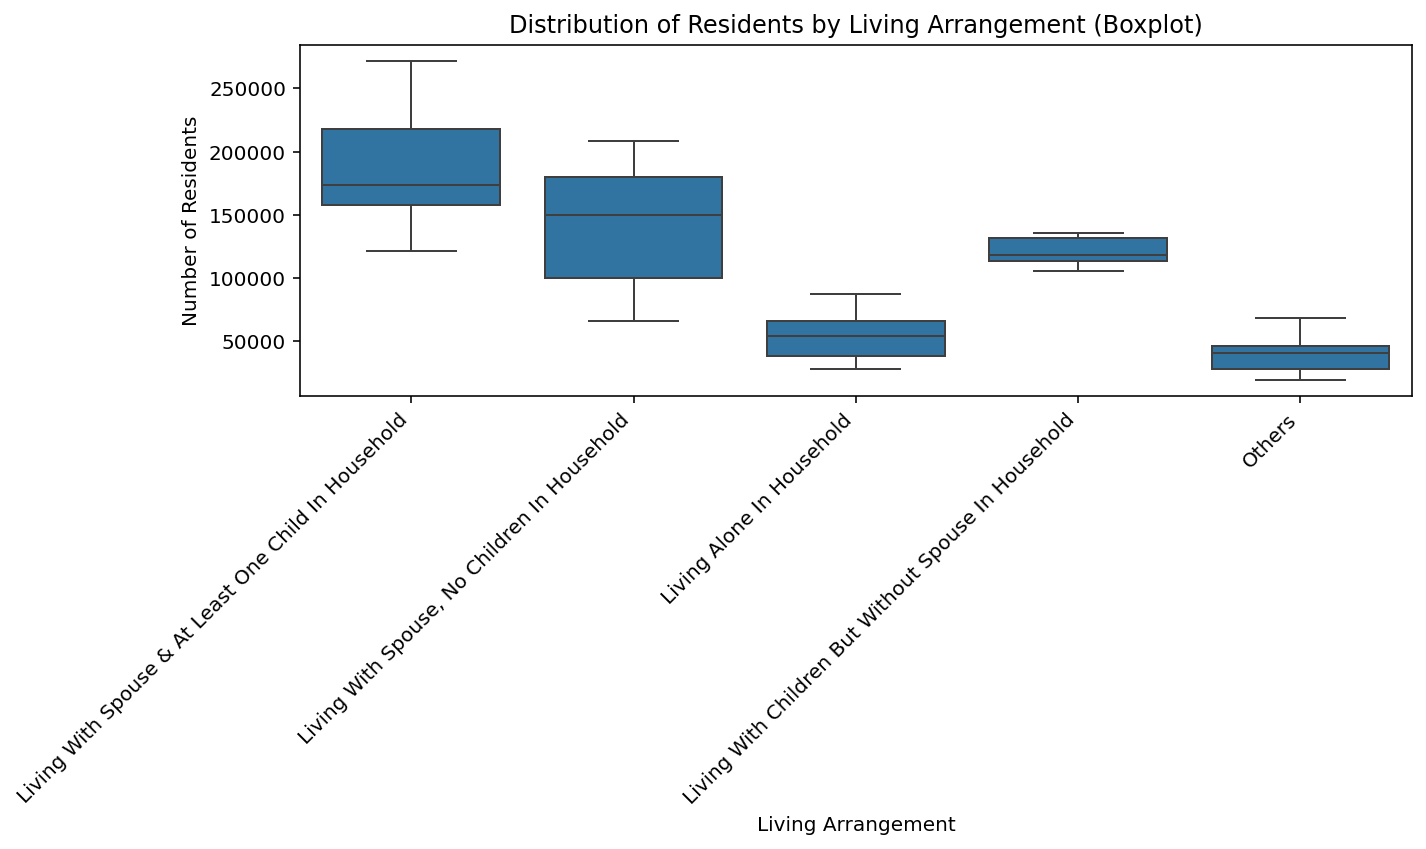

In [16]:
# Call the Functions
plot_categorical_box(df_melted)

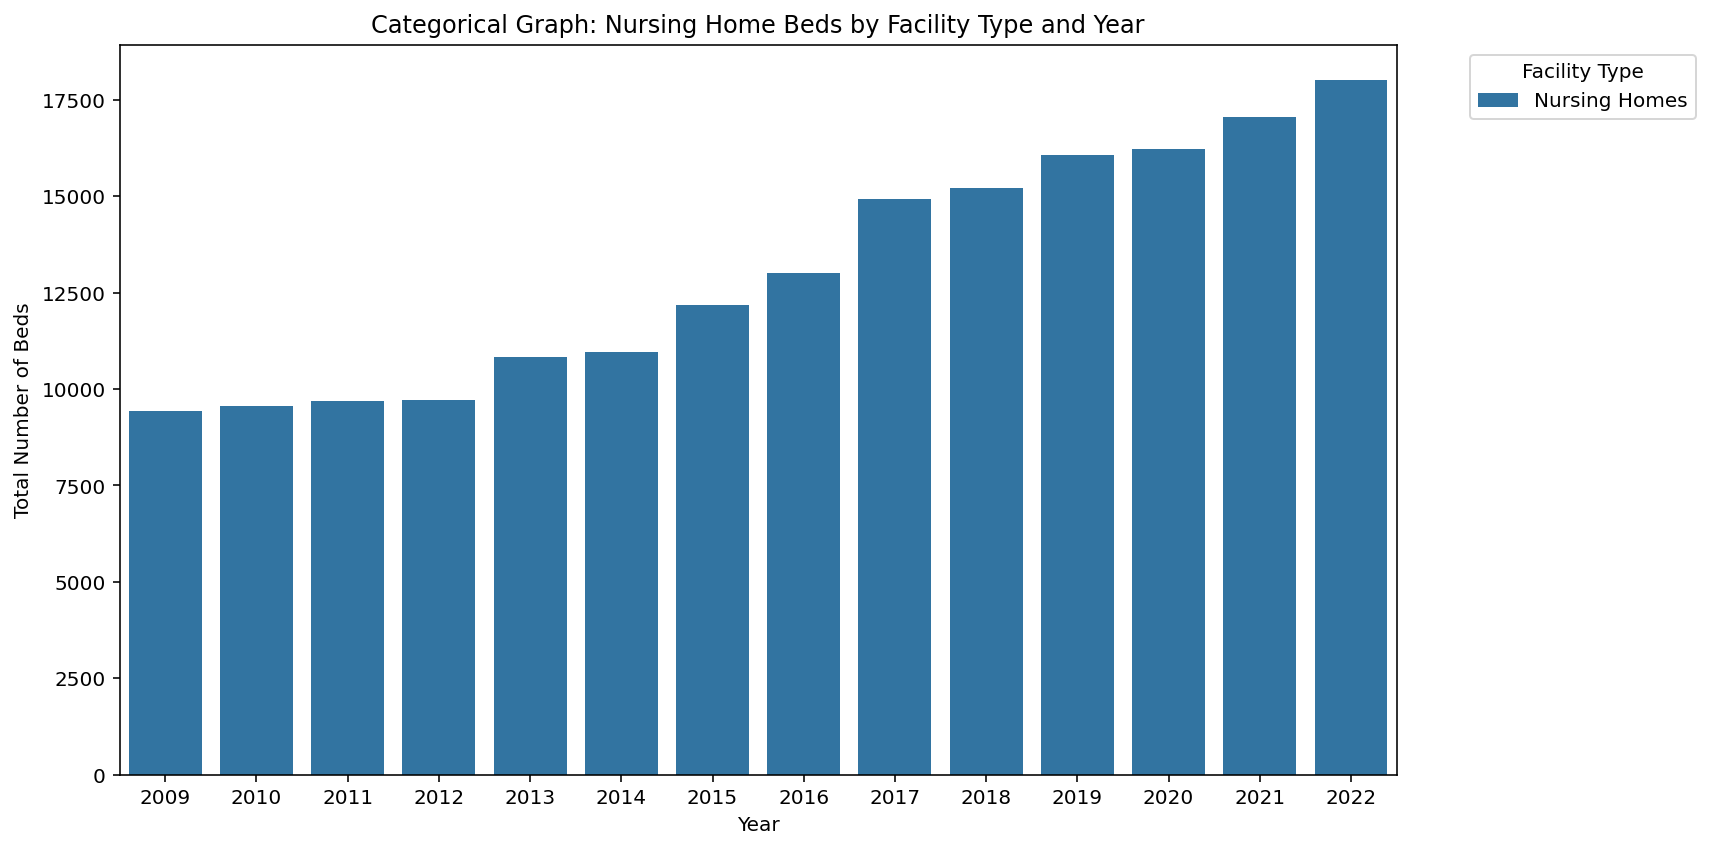

⚠️ No ownership column found in dataset.
⚠️ No ownership column found in dataset.


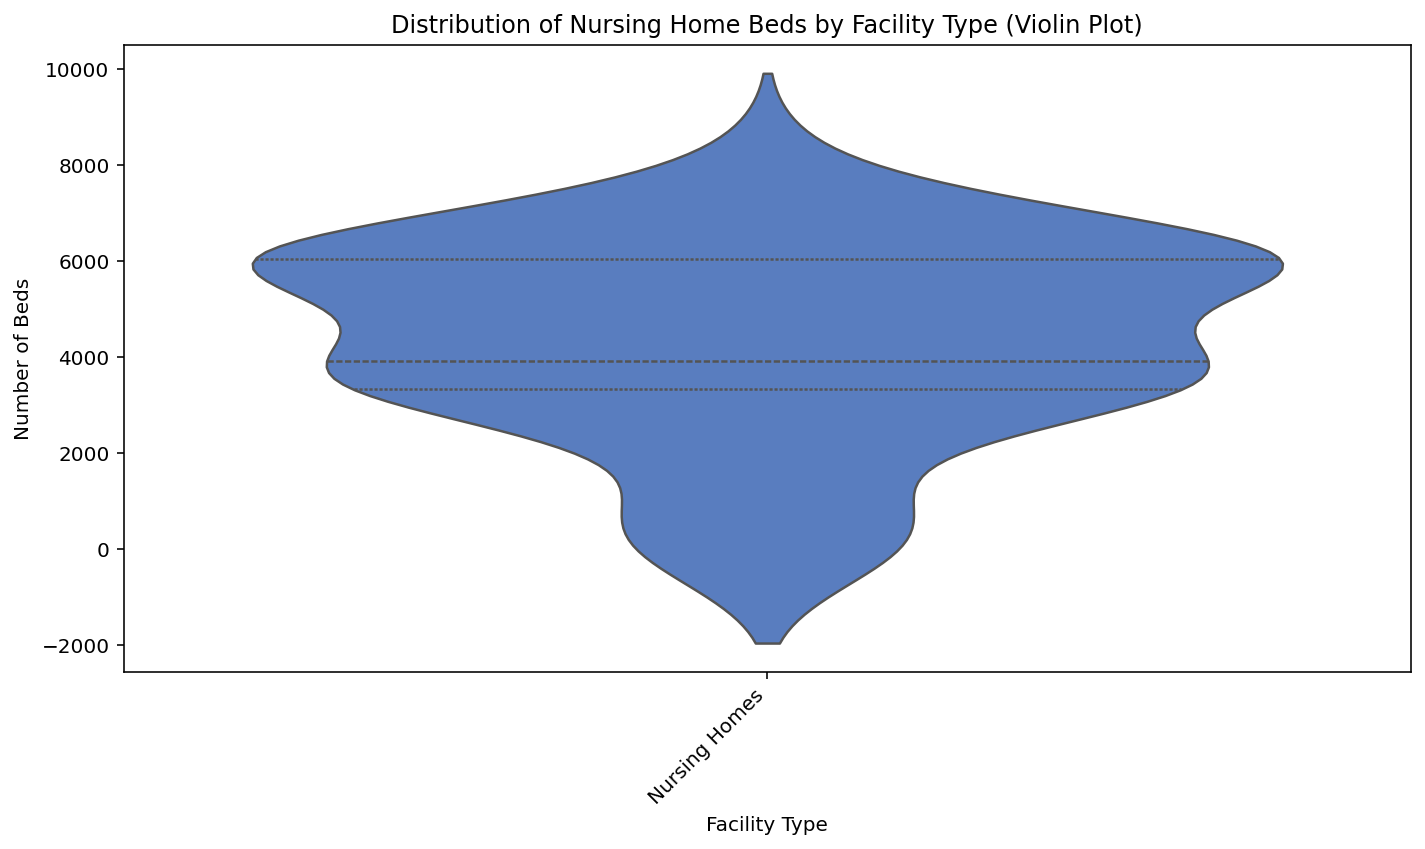

In [ ]:
# Data Cleaning
# Ensure correct data types
df_nursinghome['year'] = pd.to_numeric(df_nursinghome['year'], errors='coerce')
df_nursinghome['no_beds'] = pd.to_numeric(df_nursinghome['no_beds'], errors='coerce')

# Drop rows with missing essential values
df_nursinghome = df_nursinghome.dropna(subset=['year', 'no_beds'])

# Try to identify category columns
type_col = None
for possible in ['type', 'Type', 'facility_type_a']:
    if possible in df_nursinghome.columns:
        type_col = possible
        break

ownership_col = None
for possible in ['ownership', 'Ownership', 'owner_type', 'Owner']:
    if possible in df_nursinghome.columns:
        ownership_col = possible
        break

# Function 1: Grouped Bar Chart by Facility Type
def plot_categorical_bar_by_type(df, type_col):
    """
    Grouped bar chart comparing average number of beds per facility type by year.
    """
    if type_col is None:
        print("⚠️ No 'type' column found in dataset.")
        return

    df_grouped = df.groupby(['year', type_col], as_index=False)['no_beds'].sum()

    plt.figure(figsize=(12, 6), dpi=144)
    sns.barplot(data=df_grouped, x='year', y='no_beds', hue=type_col, palette='tab20')
    plt.title("Categorical Graph: Nursing Home Beds by Facility Type and Year")
    plt.xlabel("Year")
    plt.ylabel("Total Number of Beds")
    plt.legend(title="Facility Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# --- Function 2: Stacked Bar Chart by Ownership ---
def plot_categorical_stacked_bar_by_ownership(df, ownership_col):
    """
    Stacked bar chart showing total nursing home beds by ownership each year.
    """
    if ownership_col is None:
        print("⚠️ No ownership column found in dataset.")
        return

    df_grouped = df.groupby(['year', ownership_col], as_index=False)['no_beds'].sum()
    df_pivot = df_grouped.pivot(index='year', columns=ownership_col, values='no_beds').fillna(0)

    # Plot stacked bar chart
    df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20', edgecolor='black')
    plt.title("Stacked Bar Chart: Nursing Home Beds by Ownership and Year")
    plt.xlabel("Year")
    plt.ylabel("Total Number of Beds")
    plt.legend(title="Ownership", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# --- Function 3: Boxplot comparing distribution of beds by ownership ---
def plot_categorical_box(df, ownership_col):
    """
    Boxplot to compare the distribution of nursing home beds by ownership.
    """
    if ownership_col is None:
        print("⚠️ No ownership column found in dataset.")
        return

    plt.figure(figsize=(8, 6), dpi=144)
    sns.boxplot(data=df, x=ownership_col, y='no_beds', palette='pastel')
    plt.title("Distribution of Nursing Home Beds by Ownership (Boxplot)")
    plt.xlabel("Ownership")
    plt.ylabel("Number of Beds per Facility")
    plt.tight_layout()
    plt.show()

# --- Function 4: Violin plot to show density and spread by facility type ---
def plot_categorical_violin(df, type_col):
    """
    Violin plot showing the distribution and density of beds across facility types.
    """
    if type_col is None:
        print("⚠️ No 'type' column found in dataset.")
        return

    plt.figure(figsize=(10, 6), dpi=144)
    sns.violinplot(data=df, x=type_col, y='no_beds', inner='quartile', palette='muted')
    plt.title("Distribution of Nursing Home Beds by Facility Type (Violin Plot)")
    plt.xlabel("Facility Type")
    plt.ylabel("Number of Beds")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# --- Call the functions ---
plot_categorical_bar_by_type(df_nursinghome, type_col)
plot_categorical_stacked_bar_by_ownership(df_nursinghome, ownership_col)
plot_categorical_box(df_nursinghome, ownership_col)
plot_categorical_violin(df_nursinghome, type_col)


In [36]:
# Data Cleaning
# Ensure correct data types
df_nursinghome = df_nursinghome.reset_index()
df_nursinghome['year'] = pd.to_numeric(df_nursinghome['year'], errors='coerce')
df_nursinghome['no_beds'] = pd.to_numeric(df_nursinghome['no_beds'], errors='coerce')

# Drop rows with missing essential values
df_nursinghome = df_nursinghome.dropna(subset=['year', 'no_beds'])

# Try to identify category columns
type_col = None
for possible in ['type', 'Type', 'facility_type_a']:
    if possible in df_nursinghome.columns:
        type_col = possible
        break

ownership_col = None
for possible in ['ownership', 'Ownership', 'public_private', 'Owner']:
    if possible in df_nursinghome.columns:
        ownership_col = possible
        break

In [20]:
# Function 1: Grouped Bar Chart by Facility Type
def plot_categorical_bar_by_type(df, type_col):
    """
    Grouped bar chart comparing average number of beds per facility type by year.
    """
    if type_col is None:
        print("⚠️ No 'type' column found in dataset.")
        return

    df_grouped = df.groupby(['year', type_col], as_index=False)['no_beds'].sum()

    plt.figure(figsize=(12, 6), dpi=144)
    sns.barplot(data=df_grouped, x='year', y='no_beds', hue=type_col, palette='tab20')
    plt.title("Categorical Graph: Nursing Home Beds by Facility Type and Year")
    plt.xlabel("Year")
    plt.ylabel("Total Number of Beds")
    plt.legend(title="Facility Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

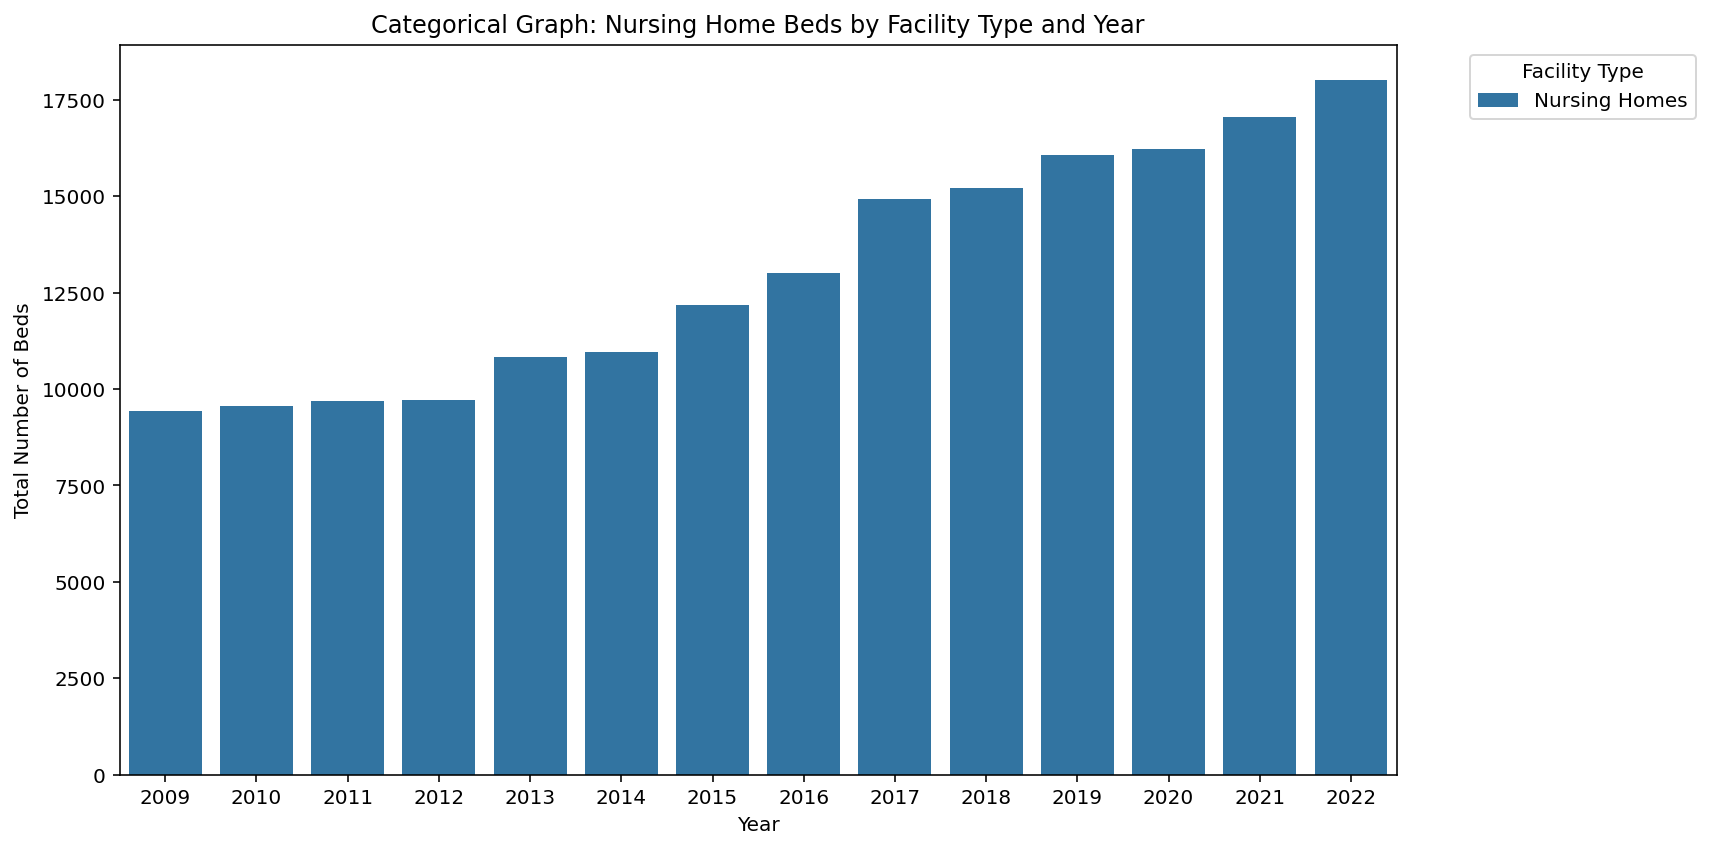

In [32]:
# Call the functions
plot_categorical_bar_by_type(df_nursinghome, type_col)

In [22]:
# Function 2: Stacked Bar Chart by Ownership
def plot_categorical_stacked_bar_by_ownership(df, ownership_col):
    """
    Stacked bar chart showing total nursing home beds by ownership each year.
    """
    if ownership_col is None:
        print("⚠️ No ownership column found in dataset.")
        return

    df_grouped = df.groupby(['year', ownership_col], as_index=False)['no_beds'].sum()
    df_pivot = df_grouped.pivot(index='year', columns=ownership_col, values='no_beds').fillna(0)

    # Plot stacked bar chart
    df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20', edgecolor='black')
    plt.title("Stacked Bar Chart: Nursing Home Beds by Ownership and Year")
    plt.xlabel("Year")
    plt.ylabel("Total Number of Beds")
    plt.legend(title="Ownership", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

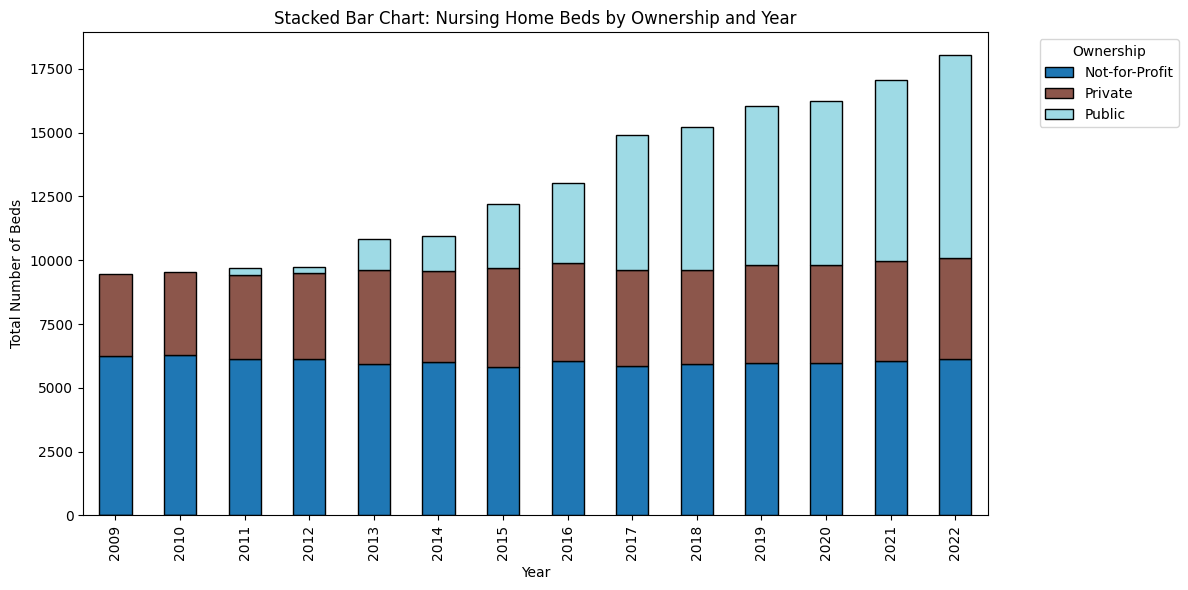

In [33]:
# Call the functions
plot_categorical_stacked_bar_by_ownership(df_nursinghome, ownership_col)

In [24]:
# Function 3: Boxplot comparing distribution of beds by ownership
def plot_categorical_box(df, ownership_col):
    """
    Boxplot to compare the distribution of nursing home beds by ownership.
    """
    if ownership_col is None:
        print("⚠️ No ownership column found in dataset.")
        return

    plt.figure(figsize=(8, 6), dpi=144)
    sns.boxplot(data=df, x=ownership_col, y='no_beds', palette='pastel')
    plt.title("Distribution of Nursing Home Beds by Ownership (Boxplot)")
    plt.xlabel("Ownership")
    plt.ylabel("Number of Beds per Facility")
    plt.tight_layout()
    plt.show()

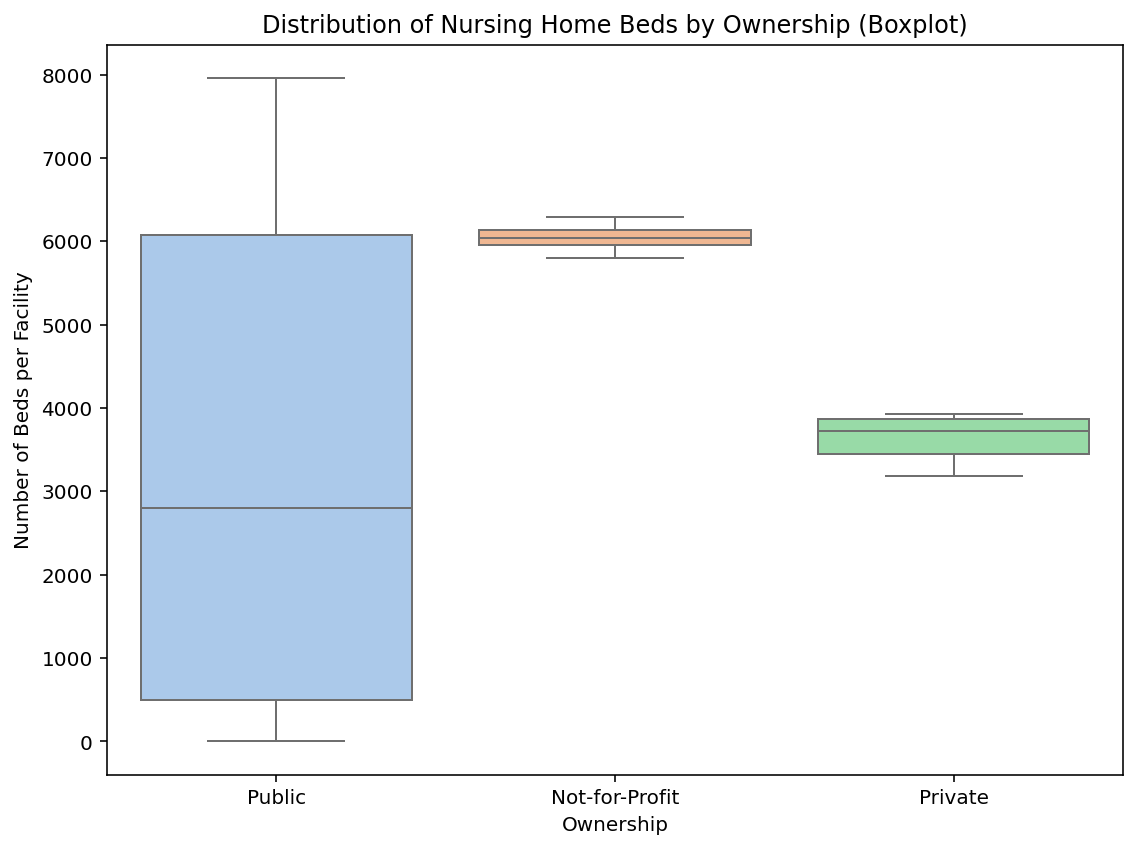

In [34]:
# Call the functions
plot_categorical_box(df_nursinghome, ownership_col)

In [26]:
# Function 4: Violin plot to show density and spread by facility type
def plot_categorical_violin(df, type_col):
    """
    Violin plot showing the distribution and density of beds across facility types.
    """
    if type_col is None:
        print("⚠️ No 'type' column found in dataset.")
        return

    plt.figure(figsize=(10, 6), dpi=144)
    sns.violinplot(data=df, x=type_col, y='no_beds', inner='quartile', palette='muted')
    plt.title("Distribution of Nursing Home Beds by Facility Type (Violin Plot)")
    plt.xlabel("Facility Type")
    plt.ylabel("Number of Beds")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

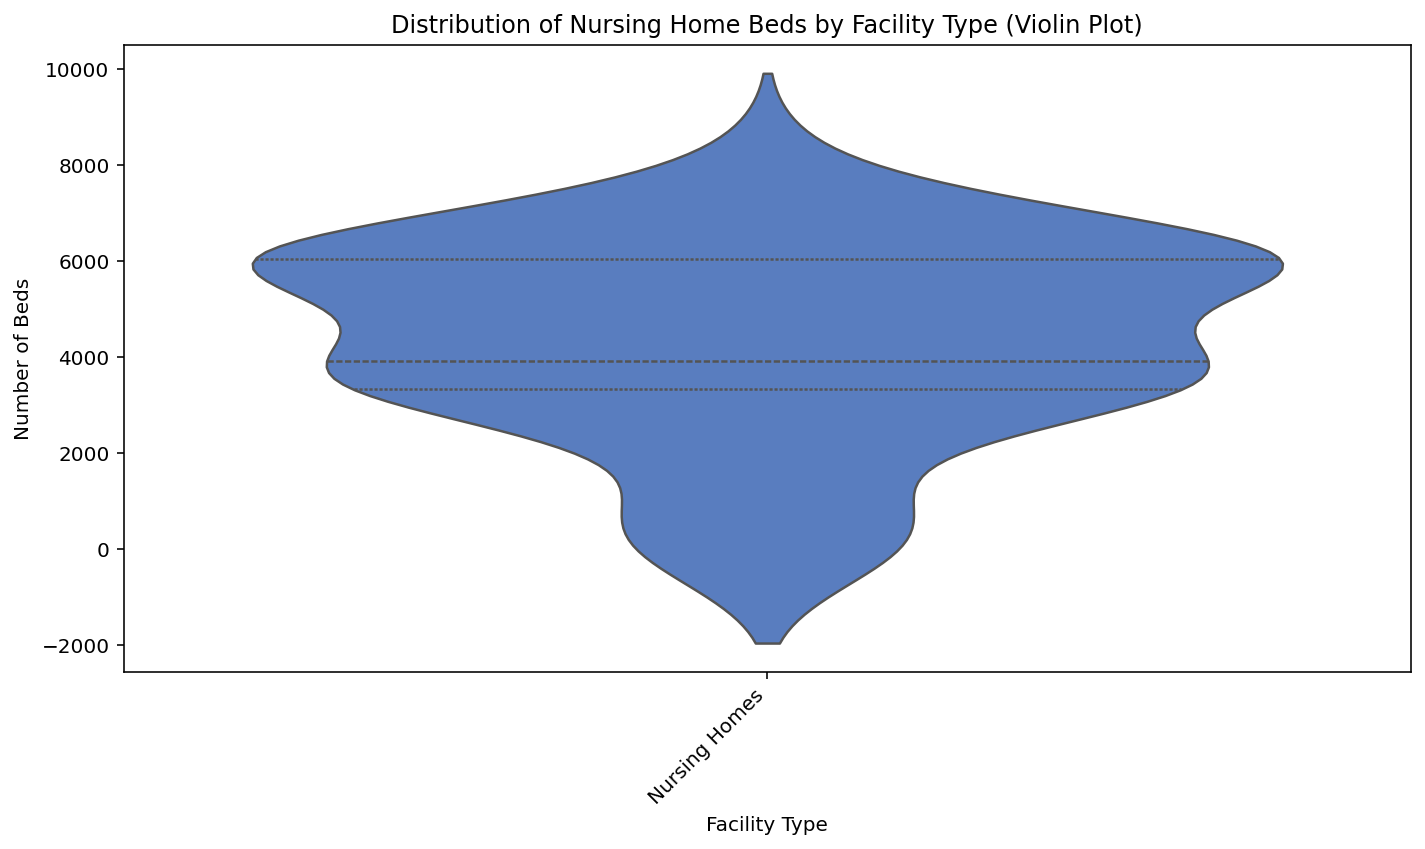

In [35]:
# Call the functions
plot_categorical_violin(df_nursinghome, type_col)

# **3. Statistical Graph**